<a href="https://colab.research.google.com/github/Samarthra/Expiry_food/blob/main/fine_tuned_model_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Dataset.csv')


print(df.describe(include='all'))


        Unnamed: 0 Fruit        Temp    Humidity         CO2        Days  \
count   250.000000   250  250.000000  250.000000  250.000000  250.000000   
unique         NaN    14         NaN         NaN         NaN         NaN   
top            NaN  Plum         NaN         NaN         NaN         NaN   
freq           NaN    25         NaN         NaN         NaN         NaN   
mean    124.500000   NaN   22.324000   61.892000  402.476000    6.420000   
std      72.312977   NaN    2.828964    7.847974    4.991702    3.865666   
min       0.000000   NaN   17.000000   43.000000  395.000000    1.000000   
25%      62.250000   NaN   21.000000   55.000000  399.000000    4.000000   
50%     124.500000   NaN   22.000000   62.500000  401.000000    5.000000   
75%     186.750000   NaN   24.000000   68.000000  404.000000    7.000000   
max     249.000000   NaN   30.000000   78.000000  420.000000   20.000000   

       Spoiled  
count      250  
unique       2  
top         No  
freq       150  
me

In [67]:
df.head(10)

,Unnamed: 0,Fruit,Temp,Humidity,CO2,Days,Spoiled
0,107,Banana,18,58,410,5,No
1,1,Banana,22,55,399,6,Yes
2,44,Plum,23,68,399,4,Yes
3,67,Tomato,22,55,419,6,Yes
4,45,Plum,22,53,400,5,Yes
5,181,Jackfruit,17,61,404,7,No
6,203,Tomato,27,69,401,3,No
7,206,Grapes,18,66,400,5,No
8,193,Tomato,27,69,401,4,No
9,90,Lemon,22,69,398,7,Yes


In [107]:
df = df.drop(columns=['Unnamed: 0'])


In [108]:
print(df.isnull().sum())


Fruit       0
Temp        0
Humidity    0
CO2         0
Days        0
Spoiled     0
dtype: int64


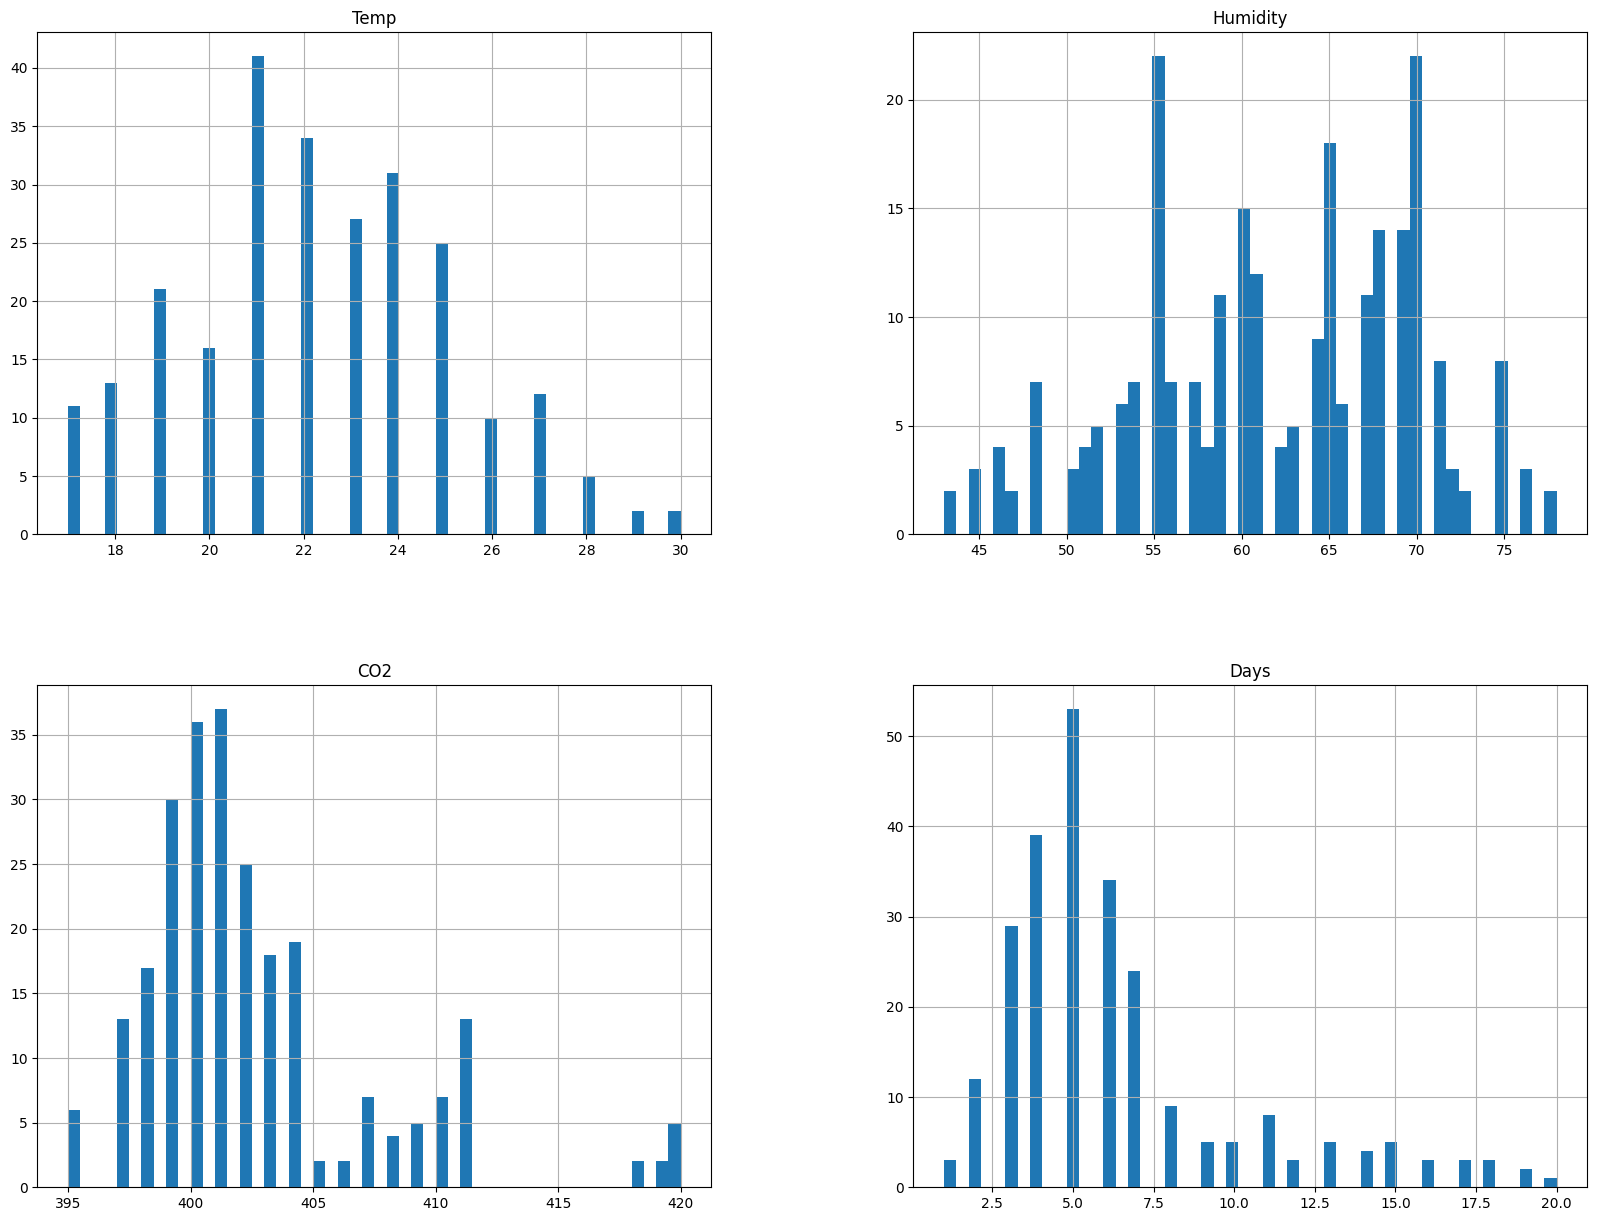

In [5]:
df.hist(bins=50, figsize=(20,15))
plt.show()


In [109]:
df['Fruit'].unique()

array(['Banana', 'Plum', 'Tomato', 'Jackfruit', 'Grapes', 'Lemon',
       'Banana ', 'Mango', 'Papaya', 'Litchi', 'Apple', 'Jackfruit ',
       'Mango ', 'Grapes '], dtype=object)

In [110]:

df['Fruit'] = df['Fruit'].str.strip()


unique_fruits = df['Fruit'].unique()
print(unique_fruits)


['Banana' 'Plum' 'Tomato' 'Jackfruit' 'Grapes' 'Lemon' 'Mango' 'Papaya'
 'Litchi' 'Apple']


In [111]:
df = df[df['Spoiled'] == 'No']

In [112]:
X = df.drop(columns=['Spoiled','Days'])

y=df['Days']

In [40]:
X

,Fruit,Temp,Humidity,CO2
0,Banana,18,58,410
5,Jackfruit,17,61,404
6,Tomato,27,69,401
7,Grapes,18,66,400
8,Tomato,27,69,401
...,...,...,...,...
245,Plum,23,68,399
246,Lemon,22,68,402
247,Papaya,19,67,402
248,Mango,25,57,404


In [41]:
y

,Days
0,5
5,7
6,3
7,5
8,4
...,...
245,3
246,5
247,5
248,7


In [113]:
categorical_features = ['Fruit']
X = pd.get_dummies(X, columns=categorical_features)


In [43]:
X

,Temp,Humidity,CO2,Fruit_Apple,Fruit_Banana,Fruit_Grapes,Fruit_Jackfruit,Fruit_Lemon,Fruit_Litchi,Fruit_Mango,Fruit_Papaya,Fruit_Plum,Fruit_Tomato
0,18,58,410,False,True,False,False,False,False,False,False,False,False
5,17,61,404,False,False,False,True,False,False,False,False,False,False
6,27,69,401,False,False,False,False,False,False,False,False,False,True
7,18,66,400,False,False,True,False,False,False,False,False,False,False
8,27,69,401,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,23,68,399,False,False,False,False,False,False,False,False,True,False
246,22,68,402,False,False,False,False,True,False,False,False,False,False
247,19,67,402,False,False,False,False,False,False,False,True,False,False
248,25,57,404,False,False,False,False,False,False,True,False,False,False


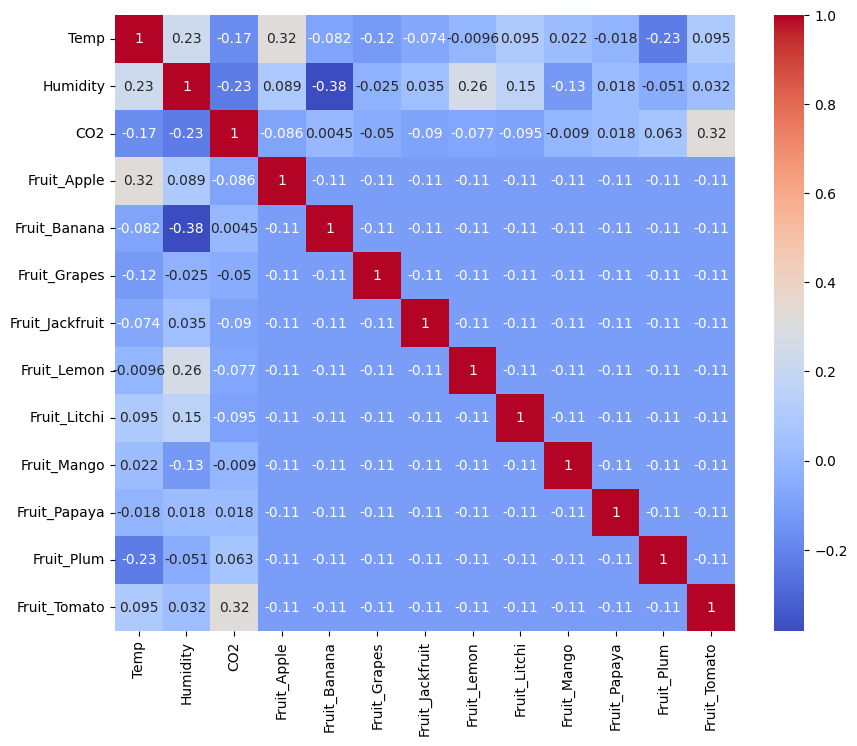

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()



In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('SVR', SVR()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('AdaBoost', AdaBoostRegressor(random_state=42))
]

model_results = []
for name, model in models:
    if name in ['SVR', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_results.append((name, mse, r2))
    print(f"{name} Mean Squared Error: {mse}, R^2: {r2}")

# Find the best model
best_model_name, best_model_mse, best_model_r2 = sorted(model_results, key=lambda x: x[1])[0]
print(f"\nBest model: {best_model_name} (MSE: {best_model_mse}, R^2: {best_model_r2})")

Linear Regression Mean Squared Error: 1.3576831840981582, R^2: 0.9229561875354134
Decision Tree Mean Squared Error: 1.4, R^2: 0.9205548549810845
Random Forest Mean Squared Error: 1.1152120723025323, R^2: 0.9367155822779143
Gradient Boosting Mean Squared Error: 1.1066945786614009, R^2: 0.9371989205047124
SVR Mean Squared Error: 2.5284217560326567, R^2: 0.8565208335164318
K-Nearest Neighbors Mean Squared Error: 1.4080000000000004, R^2: 0.9201008827238335
AdaBoost Mean Squared Error: 1.5944894998432804, R^2: 0.9095182503241518

Best model: Gradient Boosting (MSE: 1.1066945786614009, R^2: 0.9371989205047124)


In [116]:
from sklearn.metrics import confusion_matrix


threshold = y_train.median()


model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


y_test_binary = (y_test > threshold).astype(int)

# Convert the regression predictions to binary (0 or 1) based on the threshold
y_pred_binary = (y_pred > threshold).astype(int)

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test_binary, y_pred_binary).ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print the results
print(f"Gradient Boosting Sensitivity: {sensitivity}")
print(f"Gradient Boosting Specificity: {specificity}")


Gradient Boosting Sensitivity: 0.8
Gradient Boosting Specificity: 0.95


In [118]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Compute detailed metrics
tn, fp, fn, tp = confusion_matrix(y_test_binary, y_pred_binary).ravel()

# Sensitivity (Recall)
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

# Specificity
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Additional Metrics
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

# Comprehensive Reporting
print("Confusion Matrix Breakdown:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print("\nPerformance Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix Breakdown:
True Negatives (TN): 19
False Positives (FP): 1
False Negatives (FN): 2
True Positives (TP): 8

Performance Metrics:
Sensitivity (Recall): 0.8000
Specificity: 0.9500
Accuracy: 0.9000
Precision: 0.8889
F1 Score: 0.8421


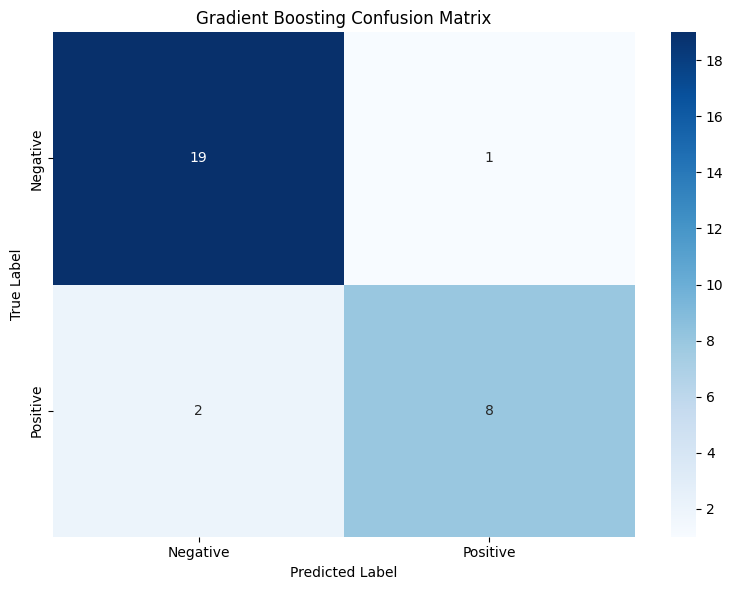

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])

    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(y_test_binary, y_pred_binary,
                      title='Gradient Boosting Confusion Matrix')


In [121]:
# Dataset Size Verification
print("Total samples:", len(X_test))
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

# Class Distribution
print("\nClass Distribution:")
print("Actual Class Distribution:")
print(y_test_binary.value_counts())
print("\nPredicted Class Distribution:")
print(pd.Series(y_pred_binary).value_counts())


Total samples: 30
Training samples: 120
Testing samples: 30

Class Distribution:
Actual Class Distribution:
Days
0    20
1    10
Name: count, dtype: int64

Predicted Class Distribution:
0    21
1     9
Name: count, dtype: int64


In [75]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


best_model = grid_search.best_estimator_


y_pred_best = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred_best)
print(f"Best Gradient Boosting Mean Squared Error: {best_mse}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Gradient Boosting Mean Squared Error: 1.0581020348521324


In [ ]:
import joblib


joblib_file = "best_gradient_boosting_model.pkl"
joblib.dump(best_model, joblib_file)

print(f"Model saved to {joblib_file}")


Model saved to best_gradient_boosting_model.pkl


In [ ]:

loaded_model = joblib.load(joblib_file)


y_pred_loaded = loaded_model.predict(X_test)
loaded_mse = mean_squared_error(y_test, y_pred_loaded)
print(f"Loaded model Mean Squared Error: {loaded_mse}")


Loaded model Mean Squared Error: 1.0581020348521324
